In [2]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import math
from tools import *
from sklearn.preprocessing import MinMaxScaler

In [26]:
data_raw = read_merged_data()

Opening UoB_Set01_2025-01-02tapes.csv


In [27]:
data = pd.DataFrame(data_raw[0])[:600]
# remove rows where last tapes price is nan
data = data.dropna(subset=["Last Tapes Price"])
data_scaled = data.copy()

scaler = MinMaxScaler(feature_range=(0,1))
# scale last tapes price
data_scaled["Last Tapes Price"] = scaler.fit_transform(data["Last Tapes Price"].values.reshape(-1,1))

# Setting 80 percent data for training
training_data_len = math.ceil(len(data) * .8)
training_data_len 
 
#Splitting the dataset
train_data = data[:training_data_len]
test_data = data[training_data_len:]
train_scaled_data = data_scaled[:training_data_len]
test_scaled_data = data_scaled[training_data_len:]
print(len(train_data), len(test_data))

 # Selecting tapes Price values
dataset_train = train_scaled_data["Last Tapes Price"].values
# Reshaping 1D to 2D array
scaled_train = np.reshape(dataset_train, (-1,1)) 

# Selecting tapes Price values
dataset_test = test_scaled_data["Last Tapes Price"].values
# Reshaping 1D to 2D array
scaled_test = np.reshape(dataset_test, (-1,1))  


472 118


In [12]:
window = 60
X_train = []
y_train = []
for i in range(window, len(scaled_train)):
    X_train.append(scaled_train[i-window:i, 0])
    y_train.append(scaled_train[i, 0])
    if i <= (window+1):
        print(X_train)
        print(y_train)
        print()

X_test = []
y_test = []
for i in range(window, len(scaled_test)):
    X_test.append(scaled_test[i-window:i, 0])
    y_test.append(scaled_test[i, 0])

# The data is converted to Numpy array
X_train, y_train = np.array(X_train), np.array(y_train)
 
#Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1],1))
y_train = np.reshape(y_train, (y_train.shape[0],1))
print("X_train :",X_train.shape,"y_train :",y_train.shape)

# The data is converted to numpy array
X_test, y_test = np.array(X_test), np.array(y_test)
 
#Reshaping
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1],1))
y_test = np.reshape(y_test, (y_test.shape[0],1))
print("X_test :",X_test.shape,"y_test :",y_test.shape)

[array([0.84615385, 0.88034188, 1.        , 0.84615385, 0.84615385,
       0.84615385, 0.84615385, 0.84615385, 0.74358974, 0.67521368,
       0.67521368, 0.69230769, 0.67032967, 0.67032967, 0.86324786,
       0.86324786, 0.57264957, 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 0.64102564, 0.4974359 , 0.44615385, 0.44615385,
       0.44615385, 0.43589744, 0.43589744, 0.43589744, 0.33333333,
       0.33333333, 0.20512821, 0.36752137, 0.38461538, 0.38461538,
       0.79487179, 0.69230769, 0.65811966, 0.65811966, 0.64102564,
       0.64102564, 0.64102564, 0.64102564, 0.53846154, 0.53846154,
       0.43589744, 0.43589744, 0.43589744, 0.43589744, 0.43589744,
       0.48717949, 0.48717949, 0.48717949, 0.64102564, 0.64102564])]
[0.6410256410256423]

[array([0.84615385, 0.88034188, 1.        , 0.84615385, 0.84615385,
       0.84615385, 0.84615385, 0.84615385, 0.74358974, 0.67521368,
       0.67521368, 0.69230769, 0.670

In [13]:
# importing libraries
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import SimpleRNN
from keras.layers import Dropout
from keras.layers import GRU, Bidirectional
from keras.optimizers import SGD
from sklearn import metrics
from sklearn.metrics import mean_squared_error

In [14]:
#Initialising the model
regressorLSTM = Sequential()
 
#Adding LSTM layers
regressorLSTM.add(LSTM(window, 
                       return_sequences = True, 
                       input_shape = (X_train.shape[1],1)))
regressorLSTM.add(LSTM(window, 
                       return_sequences = False))
regressorLSTM.add(Dense(window/2))
 
#Adding the output layer
regressorLSTM.add(Dense(1))
 
#Compiling the model
regressorLSTM.compile(optimizer = 'adam',
                      loss = 'mean_squared_error',
                      metrics = ["accuracy"])
 
#Fitting the model
regressorLSTM.fit(X_train, 
                  y_train, 
                  batch_size = 1, 
                  epochs = 12)
regressorLSTM.summary()

Epoch 1/12
412/412 [==============================] - 22s 32ms/step - loss: 0.0338 - accuracy: 0.0121
Epoch 2/12
412/412 [==============================] - 16s 40ms/step - loss: 0.0201 - accuracy: 0.0121
Epoch 3/12
412/412 [==============================] - 13s 30ms/step - loss: 0.0166 - accuracy: 0.0121
Epoch 4/12
412/412 [==============================] - 14s 34ms/step - loss: 0.0157 - accuracy: 0.0121
Epoch 5/12
412/412 [==============================] - 14s 35ms/step - loss: 0.0145 - accuracy: 0.0121
Epoch 6/12
412/412 [==============================] - 12s 30ms/step - loss: 0.0137 - accuracy: 0.0121
Epoch 7/12
412/412 [==============================] - 13s 31ms/step - loss: 0.0140 - accuracy: 0.0121
Epoch 8/12
412/412 [==============================] - 16s 38ms/step - loss: 0.0145 - accuracy: 0.0121
Epoch 9/12
412/412 [==============================] - 12s 30ms/step - loss: 0.0145 - accuracy: 0.0121
Epoch 10/12
412/412 [==============================] - 13s 32ms/step - loss: 0.013

In [50]:
y_LSTM = regressorLSTM.predict(X_test)
y_LSTM_O = scaler.inverse_transform(y_LSTM)

2/2 [==============================] - 0s 33ms/step


In [51]:
y_test_O = scaler.inverse_transform(y_test)
print("LSTM MAE:", metrics.mean_absolute_error(y_test_O, y_LSTM_O))


LSTM MAE: 1.5517140004826693


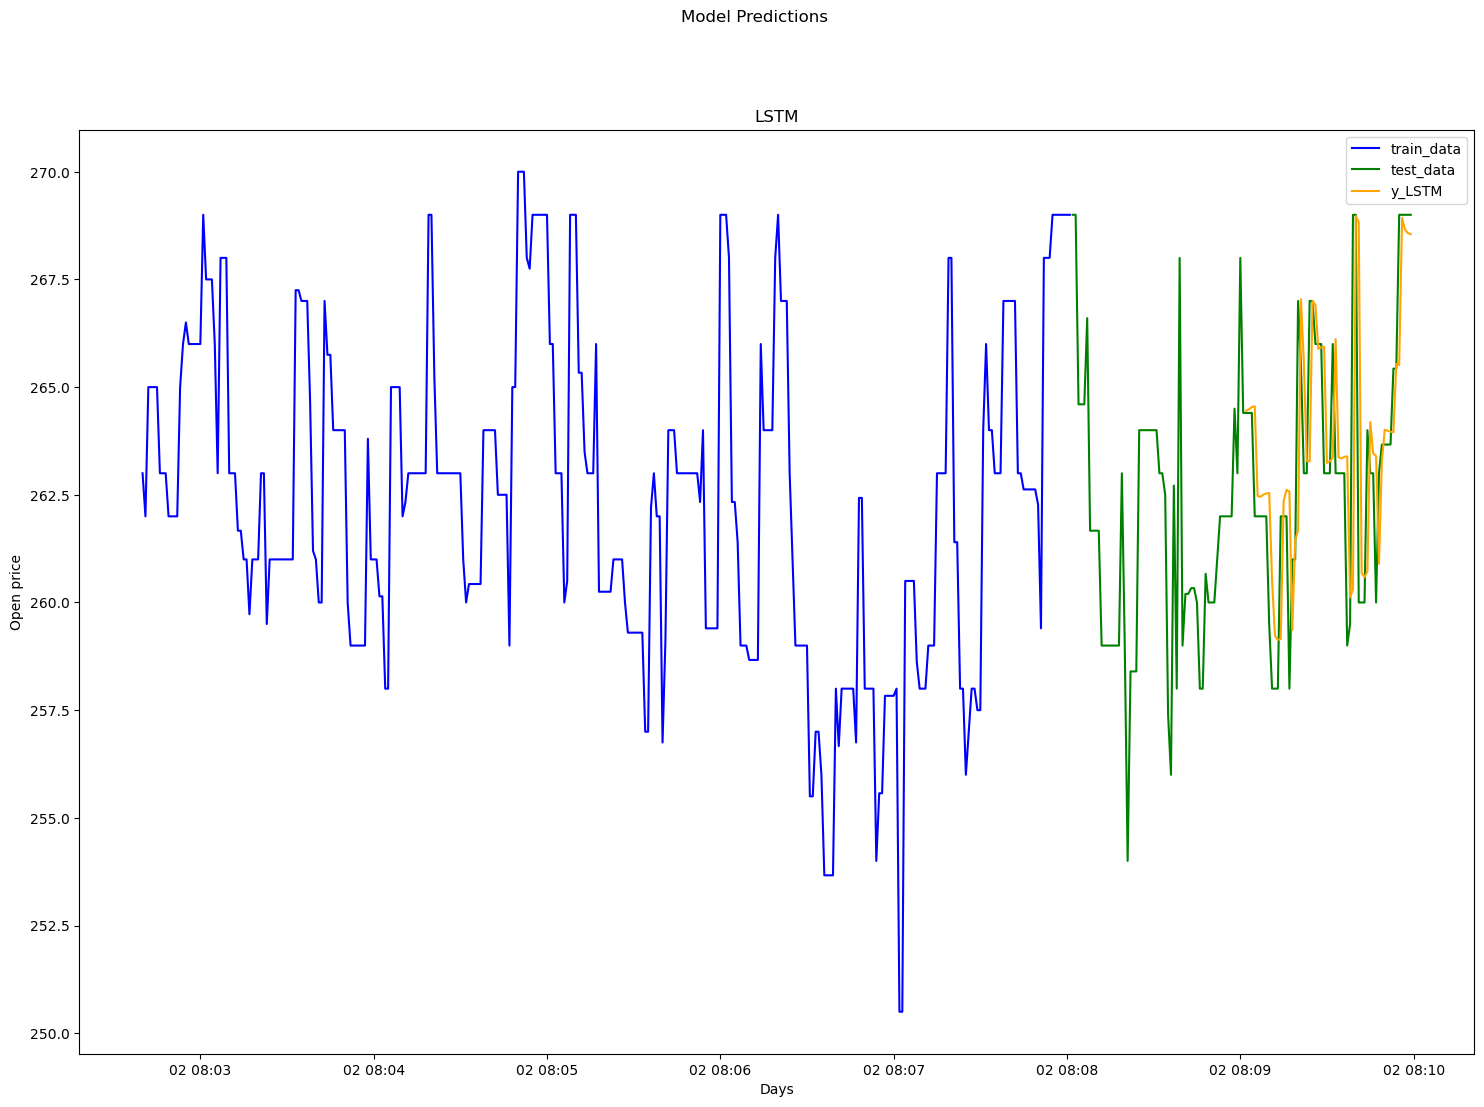

In [31]:
fig, axs = plt.subplots(1,figsize =(18,12),sharex=True, sharey=True)
fig.suptitle('Model Predictions')

#Plot for LSTM predictions
axs.plot(train_data.index[150:], train_data["Last Tapes Price"][150:], label = "train_data", color = "b")
axs.plot(test_data.index, test_data["Last Tapes Price"], label = "test_data", color = "g")
axs.plot(test_data.index[window:], y_LSTM_O, label = "y_LSTM", color = "orange")
axs.legend()
axs.title.set_text("LSTM")

plt.xlabel("Days")
plt.ylabel("Open price")
 
plt.show()

Stationary Predicted Count: 12
Stationary Actual Count: 32
Stationary Correct Count: 5
Upwards Predicted Count: 22
Upwards Actual Count: 12
Upwards Correct Count: 5
Downwards Predicted Count: 23
Downwards Actual Count: 13
Downwards Correct Count: 6
0.2807017543859649


<AxesSubplot: xlabel='combined_time'>

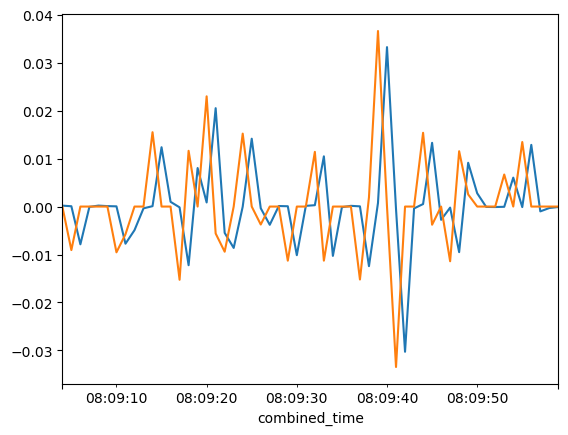

In [83]:
# check how many times signal has correctly predicted movement of actual price

# !!need to ensure that the price movement in in % values not absolute!!

# get actual price movement
actual_diff = test_data["Last Tapes Price"].pct_change().dropna()[window:]

pred = pd.DataFrame(y_LSTM_O, index = test_data.index[window:], columns = ["Last Tapes Price"])
diff = pred["Last Tapes Price"].pct_change().dropna()

threshold = 0.0001

# check if both are over 1/100 of a % increase
up_correct = (diff>threshold) & (actual_diff>threshold)
down_correct = (diff<-threshold) & (actual_diff<-threshold)
stationary_correct = ((diff<=threshold) & (diff>-threshold)) & ((actual_diff<=threshold) & (actual_diff>-threshold))

print(f"Stationary Predicted Count: {sum((diff<=threshold) & (diff>-threshold))}")
print(f"Stationary Actual Count: {sum(((actual_diff<=threshold) & (actual_diff>-threshold)))}")
print(f"Stationary Correct Count: {sum(stationary_correct)}")

#correct = diff_high*actual_diff > 0 # correct if direction is the same
#print(f"Stationary Predicted Count: {sum(diff_high== 0)}")
#print(f"Stationary Actual Count: {sum(actual_diff== 0)}")
# must also check if both are zero
#correct = correct | (diff_high == 0) & (actual_diff == 0)
correct = up_correct | down_correct | stationary_correct
print(f"Upwards Predicted Count: {sum(diff>threshold)}")
print(f"Upwards Actual Count: {sum(actual_diff>threshold)}")
print(f"Upwards Correct Count: {sum(up_correct)}")
print(f"Downwards Predicted Count: {sum(diff<-threshold)}")
print(f"Downwards Actual Count: {sum(actual_diff<-threshold)}")
print(f"Downwards Correct Count: {sum(down_correct)}")
print(correct.sum()/len(correct))

diff[1:100].plot()  
actual_diff[1:100].plot()